In [ ]:
#JAI SHREE RAM#

In [2]:
!pip install xgboost


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/train_transaction[1].csv')
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
X = data.drop(columns=['isFraud'])
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.98


In [3]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.98
Model Recall: 0.50
Model F1 Score: 0.65
Confusion Matrix:
[[113707    159]
 [  2130   2112]]


In [ ]:
model_xgb = xgboost.XGBRegressor(n_estimators=, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)
sample_ind=10
# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    ",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

100%|===================| 590294/590540 [07:35<00:00]       

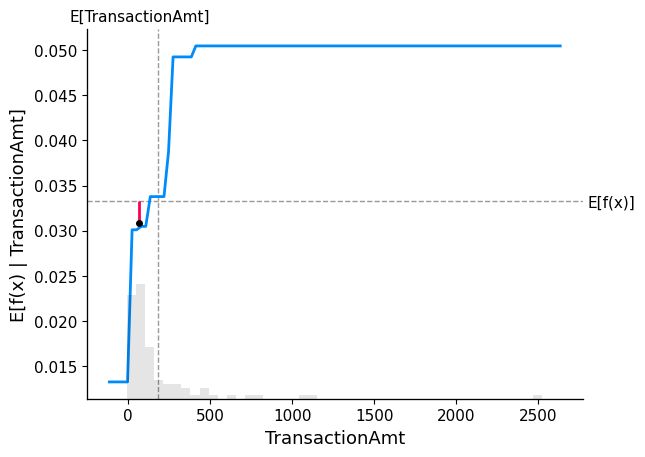

In [1]:
import pandas as pd
import xgboost as xgb
import shap

data = pd.read_csv('/content/train_transaction[1].csv')

from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X = data.drop(columns=['isFraud'])
y = data['isFraud']
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=2)
model_xgb.fit(X, y)

X100 = X.sample(100, random_state=42)
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)
feature_name = "TransactionAmt"
sample_ind = 0
fig, ax = shap.partial_dependence_plot(
    feature_name,
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)


In [4]:
import shap
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

NameError: name 'shap_values' is not defined

100%|===================| 379086/379643 [04:59<00:00]       

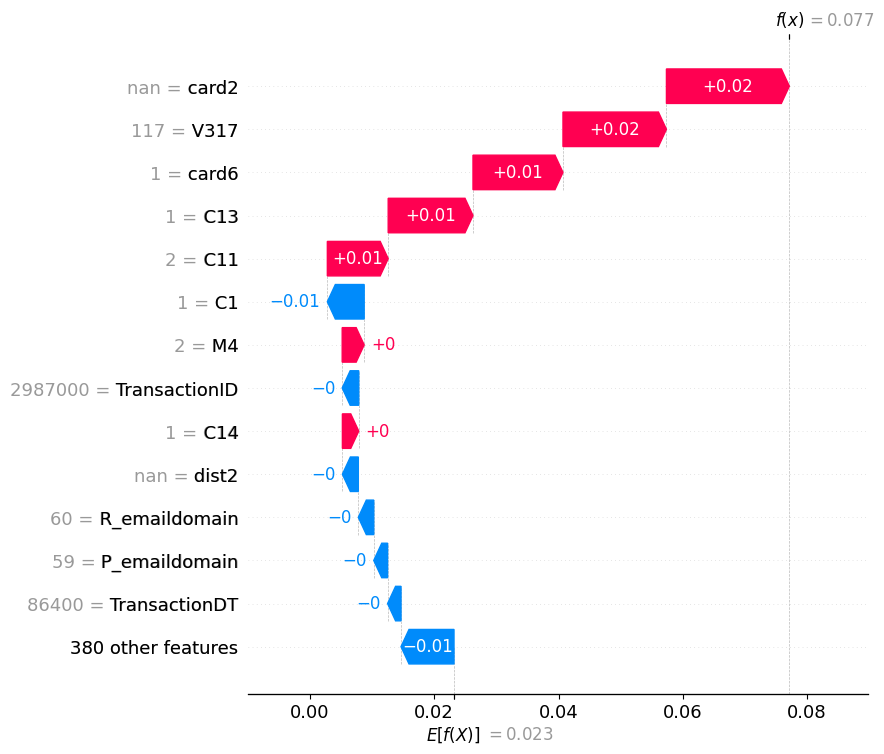

In [6]:
import shap
import pandas as pd
import xgboost as xgb
data = pd.read_csv('/content/train_transaction[1].csv')
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
X = data.drop(columns=['isFraud'])
y = data['isFraud']
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=2)
model_xgb.fit(X, y)
X100 = X.sample(100, random_state=42)
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)
feature_name = "TransactionAmt"
sample_ind = 0
shap_values = shap_values_xgb

shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')